In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 200
sample_size = 64 # fixed sample size for generator
nz = 256 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs_partc_ipnoise

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=256, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:10, 10.97it/s]                         


Epoch 1 of 200
Generator loss: 1.37481222, Discriminator loss: 0.95636134


118it [00:10, 10.89it/s]                         


Epoch 2 of 200
Generator loss: 2.36431119, Discriminator loss: 1.39693289


118it [00:11, 10.61it/s]                         


Epoch 3 of 200
Generator loss: 4.89680370, Discriminator loss: 0.47024036


118it [00:10, 10.87it/s]                         


Epoch 4 of 200
Generator loss: 4.66128070, Discriminator loss: 0.74950845


118it [00:10, 10.75it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


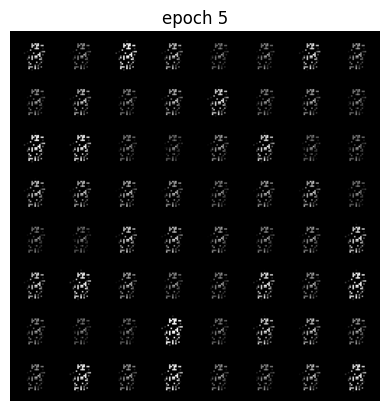

Epoch 5 of 200
Generator loss: 1.39751896, Discriminator loss: 1.17079104


118it [00:11, 10.65it/s]                         


Epoch 6 of 200
Generator loss: 2.63837631, Discriminator loss: 0.86647280


118it [00:11, 10.61it/s]                         


Epoch 7 of 200
Generator loss: 2.00685429, Discriminator loss: 1.06436915


118it [00:11, 10.73it/s]                         


Epoch 8 of 200
Generator loss: 1.87084986, Discriminator loss: 0.97859933


118it [00:10, 10.74it/s]                         


Epoch 9 of 200
Generator loss: 2.01203923, Discriminator loss: 1.11622511


118it [00:11, 10.62it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


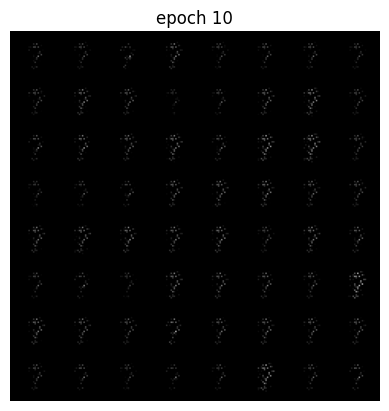

Epoch 10 of 200
Generator loss: 1.92281779, Discriminator loss: 1.18925599


118it [00:11, 10.47it/s]                         


Epoch 11 of 200
Generator loss: 0.90152663, Discriminator loss: 1.28638182


118it [00:11, 10.70it/s]                         


Epoch 12 of 200
Generator loss: 2.26246369, Discriminator loss: 1.03736557


118it [00:10, 10.75it/s]                         


Epoch 13 of 200
Generator loss: 1.15566257, Discriminator loss: 1.03277869


118it [00:11, 10.47it/s]                         


Epoch 14 of 200
Generator loss: 1.07401994, Discriminator loss: 1.04052410


118it [00:10, 10.74it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


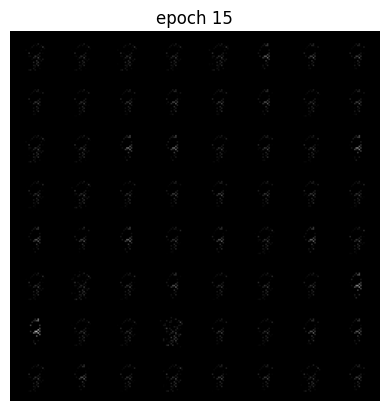

Epoch 15 of 200
Generator loss: 2.24575992, Discriminator loss: 0.64684019


118it [00:11, 10.72it/s]                         


Epoch 16 of 200
Generator loss: 3.06183707, Discriminator loss: 0.51805788


118it [00:11, 10.63it/s]                         


Epoch 17 of 200
Generator loss: 3.77254400, Discriminator loss: 0.39710271


118it [00:11, 10.63it/s]                         


Epoch 18 of 200
Generator loss: 3.51662995, Discriminator loss: 0.45096057


118it [00:11, 10.66it/s]                         


Epoch 19 of 200
Generator loss: 3.39548006, Discriminator loss: 0.53886570


118it [00:10, 10.74it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


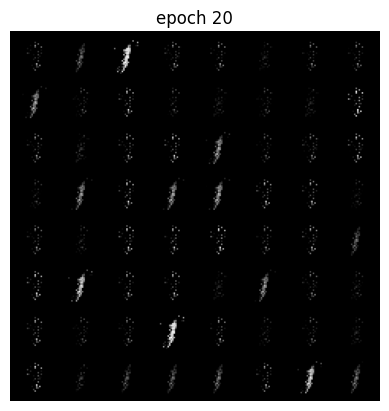

Epoch 20 of 200
Generator loss: 2.74667276, Discriminator loss: 0.52836815


118it [00:11, 10.57it/s]                         


Epoch 21 of 200
Generator loss: 3.00615830, Discriminator loss: 0.53631287


118it [00:11, 10.66it/s]                         


Epoch 22 of 200
Generator loss: 2.52021212, Discriminator loss: 0.50158327


118it [00:10, 10.76it/s]                         


Epoch 23 of 200
Generator loss: 2.57705812, Discriminator loss: 0.53375411


118it [00:11, 10.72it/s]                         


Epoch 24 of 200
Generator loss: 2.65708447, Discriminator loss: 0.65883542


118it [00:11, 10.53it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


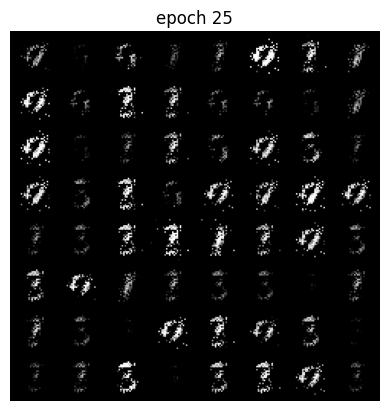

Epoch 25 of 200
Generator loss: 2.44604344, Discriminator loss: 0.64022571


118it [00:11, 10.71it/s]                         


Epoch 26 of 200
Generator loss: 2.75579796, Discriminator loss: 0.56348825


118it [00:10, 10.73it/s]                         


Epoch 27 of 200
Generator loss: 2.96560428, Discriminator loss: 0.44813513


118it [00:11, 10.63it/s]                         


Epoch 28 of 200
Generator loss: 2.91663837, Discriminator loss: 0.55972406


118it [00:11, 10.67it/s]                         


Epoch 29 of 200
Generator loss: 2.86791508, Discriminator loss: 0.56308287


118it [00:11, 10.68it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


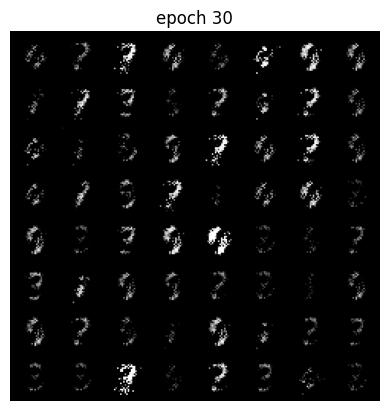

Epoch 30 of 200
Generator loss: 2.82991929, Discriminator loss: 0.45198110


118it [00:11, 10.66it/s]                         


Epoch 31 of 200
Generator loss: 2.73091915, Discriminator loss: 0.49390469


118it [00:11, 10.52it/s]                         


Epoch 32 of 200
Generator loss: 2.95304666, Discriminator loss: 0.59460939


118it [00:11, 10.70it/s]                         


Epoch 33 of 200
Generator loss: 2.84404555, Discriminator loss: 0.46859982


118it [00:11, 10.71it/s]                         


Epoch 34 of 200
Generator loss: 3.38938572, Discriminator loss: 0.50937991


118it [00:10, 10.73it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


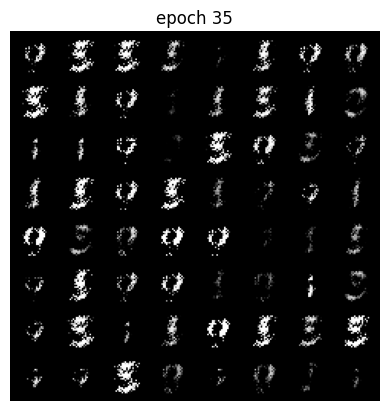

Epoch 35 of 200
Generator loss: 2.90102287, Discriminator loss: 0.61526702


118it [00:11, 10.60it/s]                         


Epoch 36 of 200
Generator loss: 2.86597992, Discriminator loss: 0.49823868


118it [00:11, 10.66it/s]                         


Epoch 37 of 200
Generator loss: 2.92545121, Discriminator loss: 0.51828116


118it [00:11, 10.70it/s]                         


Epoch 38 of 200
Generator loss: 3.01373838, Discriminator loss: 0.51418241


118it [00:11, 10.68it/s]                         


Epoch 39 of 200
Generator loss: 3.00230409, Discriminator loss: 0.50045463


118it [00:11, 10.61it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


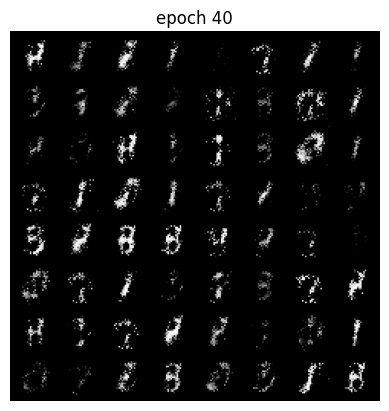

Epoch 40 of 200
Generator loss: 3.29946207, Discriminator loss: 0.39721586


118it [00:10, 10.78it/s]                         


Epoch 41 of 200
Generator loss: 3.09925536, Discriminator loss: 0.56094819


118it [00:10, 10.77it/s]                         


Epoch 42 of 200
Generator loss: 2.80475892, Discriminator loss: 0.59862461


118it [00:11, 10.63it/s]                         


Epoch 43 of 200
Generator loss: 3.14568734, Discriminator loss: 0.48879670


118it [00:11, 10.71it/s]                         


Epoch 44 of 200
Generator loss: 2.98487467, Discriminator loss: 0.48590812


118it [00:10, 10.75it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


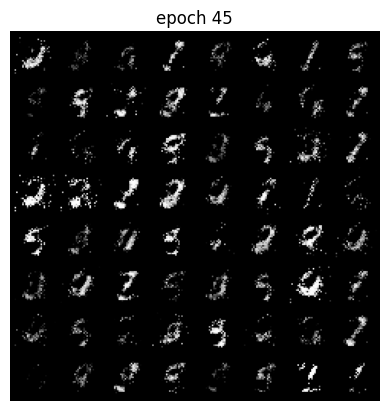

Epoch 45 of 200
Generator loss: 3.21253906, Discriminator loss: 0.42199664


118it [00:10, 10.73it/s]                         


Epoch 46 of 200
Generator loss: 2.53347397, Discriminator loss: 0.66648458


118it [00:11, 10.65it/s]                         


Epoch 47 of 200
Generator loss: 2.78429662, Discriminator loss: 0.56160524


118it [00:11, 10.72it/s]                         


Epoch 48 of 200
Generator loss: 3.08280097, Discriminator loss: 0.51034850


118it [00:10, 10.77it/s]                         


Epoch 49 of 200
Generator loss: 3.03886400, Discriminator loss: 0.53141261


118it [00:11, 10.71it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


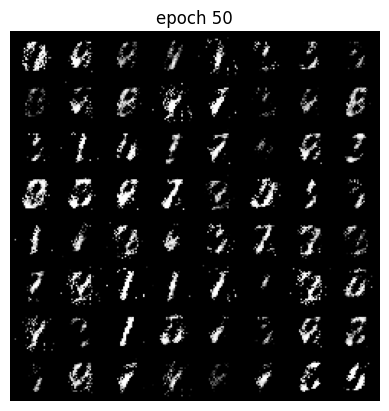

Epoch 50 of 200
Generator loss: 2.86357766, Discriminator loss: 0.53291220


118it [00:11, 10.68it/s]                         


Epoch 51 of 200
Generator loss: 3.22726121, Discriminator loss: 0.45612661


118it [00:10, 10.88it/s]                         


Epoch 52 of 200
Generator loss: 2.79069369, Discriminator loss: 0.52544654


118it [00:10, 10.80it/s]                         


Epoch 53 of 200
Generator loss: 2.89120064, Discriminator loss: 0.50993865


118it [00:11, 10.62it/s]                         


Epoch 54 of 200
Generator loss: 2.70083900, Discriminator loss: 0.59228165


118it [00:11, 10.72it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


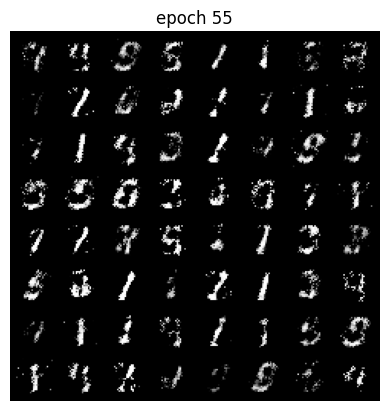

Epoch 55 of 200
Generator loss: 2.47499148, Discriminator loss: 0.60984179


118it [00:10, 10.74it/s]                         


Epoch 56 of 200
Generator loss: 2.78563867, Discriminator loss: 0.56820301


118it [00:11, 10.71it/s]                         


Epoch 57 of 200
Generator loss: 2.65054840, Discriminator loss: 0.54985695


118it [00:11, 10.62it/s]                         


Epoch 58 of 200
Generator loss: 2.71551432, Discriminator loss: 0.60417157


118it [00:11, 10.69it/s]                         


Epoch 59 of 200
Generator loss: 2.38189872, Discriminator loss: 0.64243185


118it [00:11, 10.44it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


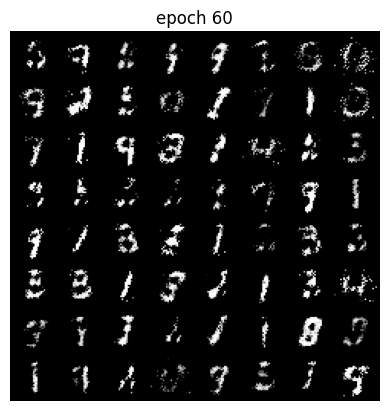

Epoch 60 of 200
Generator loss: 2.47470366, Discriminator loss: 0.65379814


118it [00:11, 10.72it/s]                         


Epoch 61 of 200
Generator loss: 2.65525893, Discriminator loss: 0.58281121


118it [00:11, 10.72it/s]                         


Epoch 62 of 200
Generator loss: 2.69542069, Discriminator loss: 0.60503012


118it [00:10, 10.84it/s]                         


Epoch 63 of 200
Generator loss: 2.43572569, Discriminator loss: 0.60574343


118it [00:10, 10.86it/s]                         


Epoch 64 of 200
Generator loss: 2.67717337, Discriminator loss: 0.56622368


118it [00:11, 10.62it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


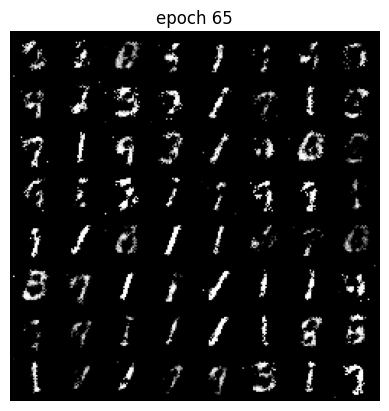

Epoch 65 of 200
Generator loss: 2.58874848, Discriminator loss: 0.60719792


118it [00:10, 10.90it/s]                         


Epoch 66 of 200
Generator loss: 2.47968001, Discriminator loss: 0.59636184


118it [00:10, 10.89it/s]                         


Epoch 67 of 200
Generator loss: 2.67727131, Discriminator loss: 0.59148731


118it [00:10, 10.90it/s]                         


Epoch 68 of 200
Generator loss: 2.53601905, Discriminator loss: 0.63856723


118it [00:11, 10.70it/s]                         


Epoch 69 of 200
Generator loss: 2.39407850, Discriminator loss: 0.69561025


118it [00:10, 10.87it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


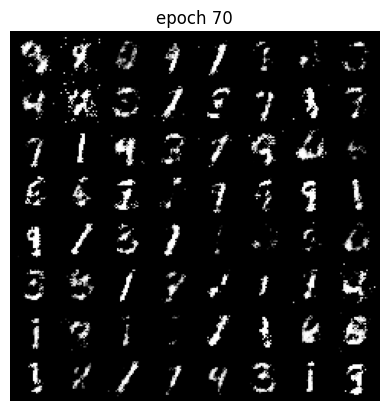

Epoch 70 of 200
Generator loss: 2.37607638, Discriminator loss: 0.67830906


118it [00:10, 10.76it/s]                         


Epoch 71 of 200
Generator loss: 2.37049432, Discriminator loss: 0.66270067


118it [00:11, 10.73it/s]                         


Epoch 72 of 200
Generator loss: 2.29748050, Discriminator loss: 0.71524043


118it [00:11, 10.68it/s]                         


Epoch 73 of 200
Generator loss: 2.29784728, Discriminator loss: 0.66173748


118it [00:10, 10.87it/s]                         


Epoch 74 of 200
Generator loss: 2.33588091, Discriminator loss: 0.68744266


118it [00:10, 10.81it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


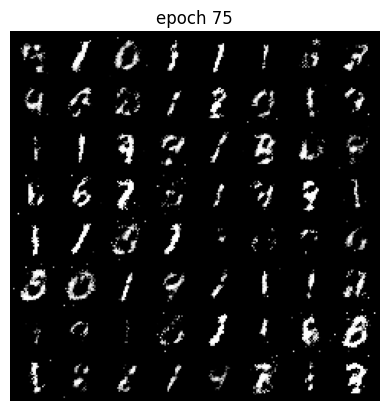

Epoch 75 of 200
Generator loss: 2.35550326, Discriminator loss: 0.69893291


118it [00:11, 10.68it/s]                         


Epoch 76 of 200
Generator loss: 2.16554630, Discriminator loss: 0.71558007


118it [00:11, 10.72it/s]                         


Epoch 77 of 200
Generator loss: 2.33400082, Discriminator loss: 0.68915863


118it [00:10, 10.84it/s]                         


Epoch 78 of 200
Generator loss: 2.33735334, Discriminator loss: 0.64687604


118it [00:10, 10.85it/s]                         


Epoch 79 of 200
Generator loss: 2.35693544, Discriminator loss: 0.66830442


118it [00:10, 11.44it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


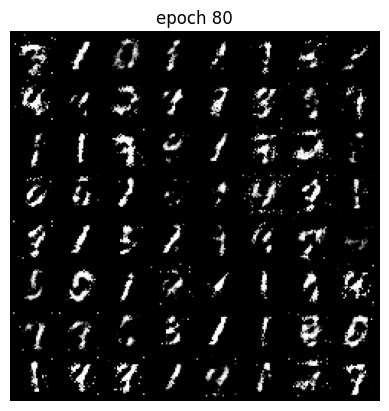

Epoch 80 of 200
Generator loss: 2.18592330, Discriminator loss: 0.72630563


118it [00:10, 11.62it/s]                         


Epoch 81 of 200
Generator loss: 2.20223916, Discriminator loss: 0.68693342


118it [00:10, 11.64it/s]                         


Epoch 82 of 200
Generator loss: 2.14974510, Discriminator loss: 0.70004265


118it [00:10, 11.59it/s]                         


Epoch 83 of 200
Generator loss: 2.20313542, Discriminator loss: 0.71918058


118it [00:10, 11.62it/s]                         


Epoch 84 of 200
Generator loss: 2.19263339, Discriminator loss: 0.72002627


118it [00:10, 11.69it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


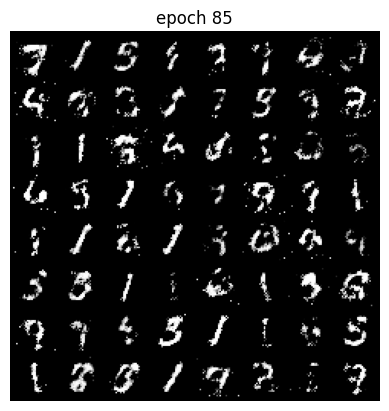

Epoch 85 of 200
Generator loss: 1.97219877, Discriminator loss: 0.82273064


118it [00:10, 11.64it/s]                         


Epoch 86 of 200
Generator loss: 2.00599402, Discriminator loss: 0.78546497


118it [00:10, 11.46it/s]                         


Epoch 87 of 200
Generator loss: 2.06611102, Discriminator loss: 0.76422786


118it [00:10, 11.62it/s]                         


Epoch 88 of 200
Generator loss: 2.08784558, Discriminator loss: 0.78709150


118it [00:10, 11.59it/s]                         


Epoch 89 of 200
Generator loss: 2.06725165, Discriminator loss: 0.76053388


118it [00:10, 11.63it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


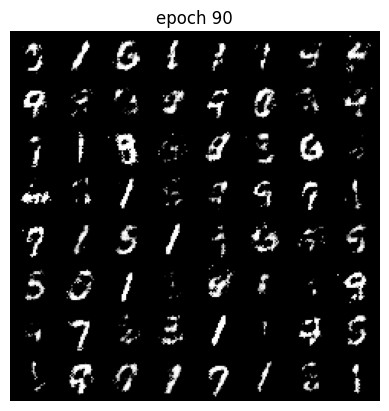

Epoch 90 of 200
Generator loss: 2.03619039, Discriminator loss: 0.78865739


118it [00:10, 11.61it/s]                         


Epoch 91 of 200
Generator loss: 2.06521979, Discriminator loss: 0.74122341


118it [00:10, 11.67it/s]                         


Epoch 92 of 200
Generator loss: 2.10430894, Discriminator loss: 0.76645935


118it [00:10, 11.54it/s]                         


Epoch 93 of 200
Generator loss: 2.01560570, Discriminator loss: 0.76390422


118it [00:10, 11.67it/s]                         


Epoch 94 of 200
Generator loss: 2.07196564, Discriminator loss: 0.77521792


118it [00:10, 11.64it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


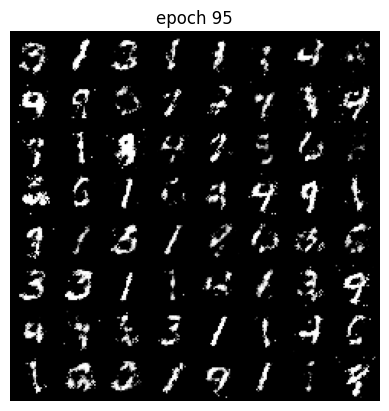

Epoch 95 of 200
Generator loss: 2.03996821, Discriminator loss: 0.76918642


118it [00:10, 11.74it/s]                         


Epoch 96 of 200
Generator loss: 2.15550168, Discriminator loss: 0.73945873


118it [00:10, 11.77it/s]                         


Epoch 97 of 200
Generator loss: 1.99740561, Discriminator loss: 0.78633156


118it [00:10, 11.75it/s]                         


Epoch 98 of 200
Generator loss: 2.08144184, Discriminator loss: 0.75936790


118it [00:10, 11.64it/s]                         


Epoch 99 of 200
Generator loss: 2.10597028, Discriminator loss: 0.75609426


118it [00:10, 11.64it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


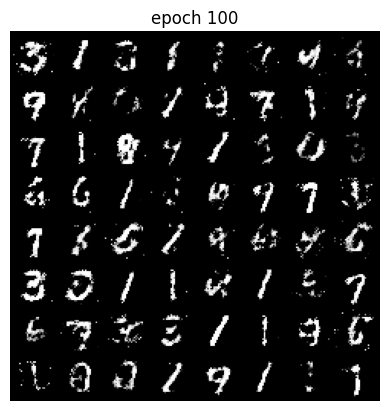

Epoch 100 of 200
Generator loss: 2.01009118, Discriminator loss: 0.78230527


118it [00:10, 11.65it/s]                         


Epoch 101 of 200
Generator loss: 2.00601651, Discriminator loss: 0.77710393


118it [00:10, 11.69it/s]                         


Epoch 102 of 200
Generator loss: 1.95621295, Discriminator loss: 0.79652452


118it [00:10, 11.71it/s]                         


Epoch 103 of 200
Generator loss: 1.90976838, Discriminator loss: 0.82481491


118it [00:10, 11.72it/s]                         


Epoch 104 of 200
Generator loss: 1.88867637, Discriminator loss: 0.82908473


118it [00:10, 11.71it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


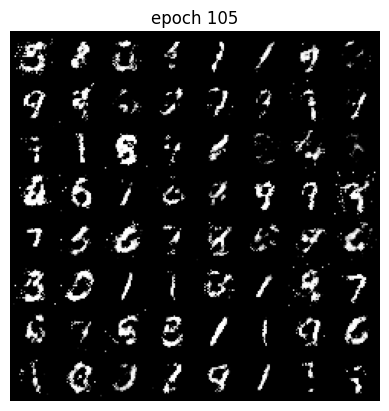

Epoch 105 of 200
Generator loss: 1.91274125, Discriminator loss: 0.82949062


118it [00:10, 11.66it/s]                         


Epoch 106 of 200
Generator loss: 1.87959569, Discriminator loss: 0.82633581


118it [00:10, 11.70it/s]                         


Epoch 107 of 200
Generator loss: 1.98077461, Discriminator loss: 0.79153365


118it [00:10, 11.71it/s]                         


Epoch 108 of 200
Generator loss: 1.88528626, Discriminator loss: 0.83570055


118it [00:10, 11.69it/s]                         


Epoch 109 of 200
Generator loss: 1.77466320, Discriminator loss: 0.83981688


118it [00:10, 11.71it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


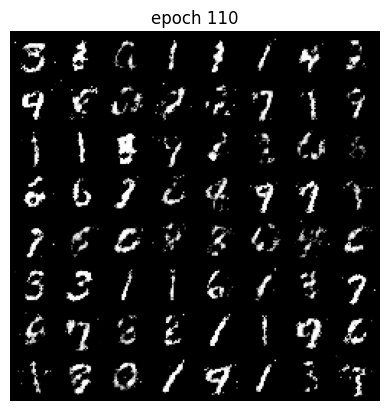

Epoch 110 of 200
Generator loss: 1.77884679, Discriminator loss: 0.86811420


118it [00:10, 11.73it/s]                         


Epoch 111 of 200
Generator loss: 1.76036693, Discriminator loss: 0.87058627


118it [00:10, 11.68it/s]                         


Epoch 112 of 200
Generator loss: 1.72547755, Discriminator loss: 0.89769652


118it [00:10, 11.73it/s]                         


Epoch 113 of 200
Generator loss: 1.89817945, Discriminator loss: 0.85260900


118it [00:10, 11.70it/s]                         


Epoch 114 of 200
Generator loss: 1.73831884, Discriminator loss: 0.88488127


118it [00:10, 11.71it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


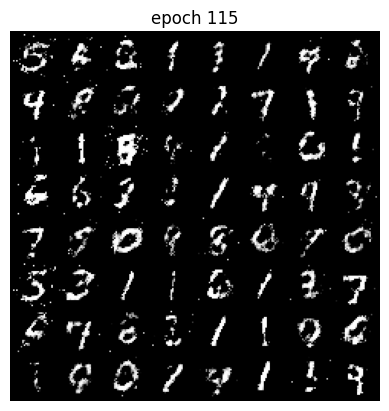

Epoch 115 of 200
Generator loss: 1.83503643, Discriminator loss: 0.85134115


118it [00:10, 11.67it/s]                         


Epoch 116 of 200
Generator loss: 1.87174311, Discriminator loss: 0.85455002


118it [00:10, 11.64it/s]                         


Epoch 117 of 200
Generator loss: 1.79880192, Discriminator loss: 0.85637163


118it [00:10, 11.63it/s]                         


Epoch 118 of 200
Generator loss: 1.80232846, Discriminator loss: 0.85562079


118it [00:10, 11.70it/s]                         


Epoch 119 of 200
Generator loss: 1.73765883, Discriminator loss: 0.87145637


118it [00:10, 11.68it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


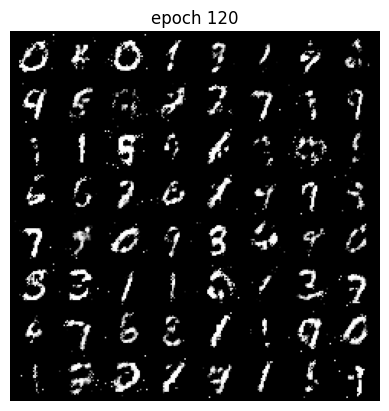

Epoch 120 of 200
Generator loss: 1.74269660, Discriminator loss: 0.88754800


118it [00:10, 11.71it/s]                         


Epoch 121 of 200
Generator loss: 1.80837922, Discriminator loss: 0.86245454


118it [00:10, 11.71it/s]                         


Epoch 122 of 200
Generator loss: 1.76231647, Discriminator loss: 0.87940266


118it [00:10, 11.61it/s]                         


Epoch 123 of 200
Generator loss: 1.71069589, Discriminator loss: 0.91746732


118it [00:10, 11.76it/s]                         


Epoch 124 of 200
Generator loss: 1.75489482, Discriminator loss: 0.87753044


118it [00:10, 11.70it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


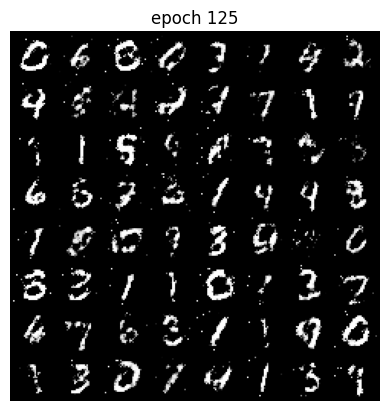

Epoch 125 of 200
Generator loss: 1.74589357, Discriminator loss: 0.88011032


118it [00:10, 11.76it/s]                         


Epoch 126 of 200
Generator loss: 1.78101523, Discriminator loss: 0.89877043


118it [00:10, 11.74it/s]                         


Epoch 127 of 200
Generator loss: 1.76453206, Discriminator loss: 0.86881760


118it [00:10, 11.70it/s]                         


Epoch 128 of 200
Generator loss: 1.82375376, Discriminator loss: 0.86543729


118it [00:10, 11.66it/s]                         


Epoch 129 of 200
Generator loss: 1.68650962, Discriminator loss: 0.89304367


118it [00:10, 11.71it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


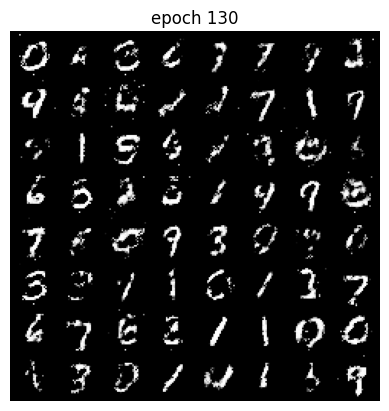

Epoch 130 of 200
Generator loss: 1.71482873, Discriminator loss: 0.91785569


118it [00:10, 11.71it/s]                         


Epoch 131 of 200
Generator loss: 1.64487593, Discriminator loss: 0.93372433


118it [00:10, 11.76it/s]                         


Epoch 132 of 200
Generator loss: 1.61686663, Discriminator loss: 0.94194505


118it [00:10, 11.77it/s]                         


Epoch 133 of 200
Generator loss: 1.63840896, Discriminator loss: 0.92695249


118it [00:10, 11.78it/s]                         


Epoch 134 of 200
Generator loss: 1.65556524, Discriminator loss: 0.95085804


118it [00:10, 11.59it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


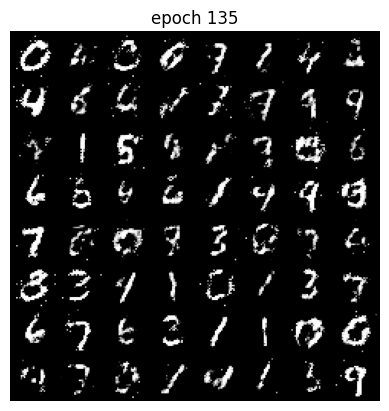

Epoch 135 of 200
Generator loss: 1.62105287, Discriminator loss: 0.93203644


118it [00:10, 11.73it/s]                         


Epoch 136 of 200
Generator loss: 1.60281614, Discriminator loss: 0.94109550


118it [00:10, 11.75it/s]                         


Epoch 137 of 200
Generator loss: 1.55754342, Discriminator loss: 0.95442676


118it [00:10, 11.74it/s]                         


Epoch 138 of 200
Generator loss: 1.55413667, Discriminator loss: 0.95334733


118it [00:10, 11.69it/s]                         


Epoch 139 of 200
Generator loss: 1.61960075, Discriminator loss: 0.94337791


118it [00:10, 11.71it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


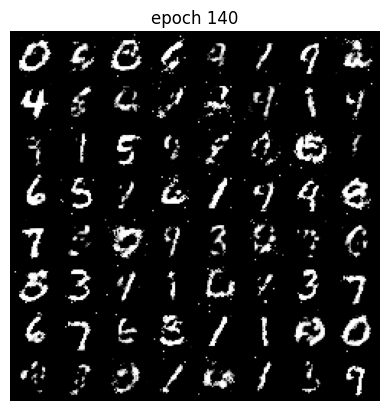

Epoch 140 of 200
Generator loss: 1.52104049, Discriminator loss: 0.95966584


118it [00:10, 11.61it/s]                         


Epoch 141 of 200
Generator loss: 1.55298384, Discriminator loss: 0.97770449


118it [00:10, 11.74it/s]                         


Epoch 142 of 200
Generator loss: 1.50696497, Discriminator loss: 0.96606489


118it [00:10, 11.69it/s]                         


Epoch 143 of 200
Generator loss: 1.53216096, Discriminator loss: 0.99538900


118it [00:10, 11.73it/s]                         


Epoch 144 of 200
Generator loss: 1.48773832, Discriminator loss: 0.98831465


118it [00:10, 11.72it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


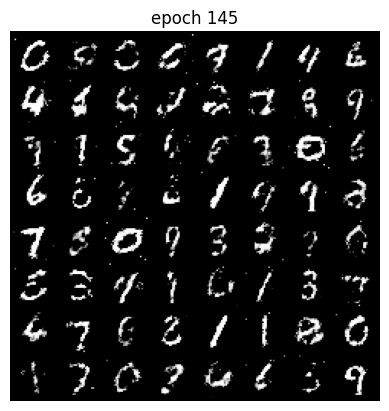

Epoch 145 of 200
Generator loss: 1.56495909, Discriminator loss: 0.95847357


118it [00:10, 11.66it/s]                         


Epoch 146 of 200
Generator loss: 1.48490127, Discriminator loss: 0.98891919


118it [00:10, 11.65it/s]                         


Epoch 147 of 200
Generator loss: 1.45777160, Discriminator loss: 0.98673091


118it [00:10, 11.74it/s]                         


Epoch 148 of 200
Generator loss: 1.51712767, Discriminator loss: 0.97517199


118it [00:10, 11.75it/s]                         


Epoch 149 of 200
Generator loss: 1.43984465, Discriminator loss: 1.01918796


118it [00:10, 11.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


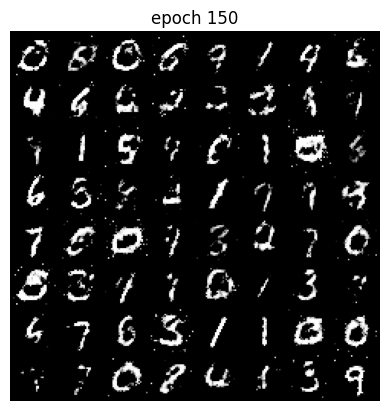

Epoch 150 of 200
Generator loss: 1.42687251, Discriminator loss: 1.00816343


118it [00:09, 11.83it/s]                         


Epoch 151 of 200
Generator loss: 1.43911489, Discriminator loss: 1.02423802


118it [00:09, 11.84it/s]                         


Epoch 152 of 200
Generator loss: 1.45542830, Discriminator loss: 0.99548967


118it [00:10, 11.70it/s]                         


Epoch 153 of 200
Generator loss: 1.45135021, Discriminator loss: 0.99429003


118it [00:10, 11.77it/s]                         


Epoch 154 of 200
Generator loss: 1.43179268, Discriminator loss: 1.01267870


118it [00:10, 11.78it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


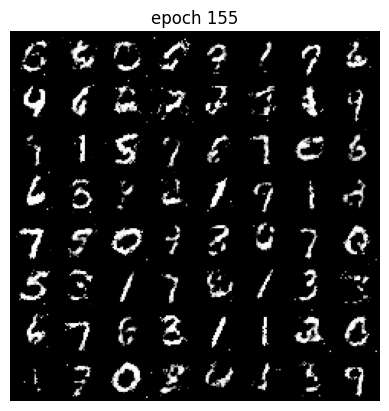

Epoch 155 of 200
Generator loss: 1.42051364, Discriminator loss: 1.01190308


118it [00:10, 11.79it/s]                         


Epoch 156 of 200
Generator loss: 1.44079058, Discriminator loss: 1.01930684


118it [00:09, 11.81it/s]                         


Epoch 157 of 200
Generator loss: 1.44421943, Discriminator loss: 1.03930532


118it [00:10, 11.73it/s]                         


Epoch 158 of 200
Generator loss: 1.40309914, Discriminator loss: 1.02947146


118it [00:10, 11.77it/s]                         


Epoch 159 of 200
Generator loss: 1.40967133, Discriminator loss: 0.99750431


118it [00:10, 11.80it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


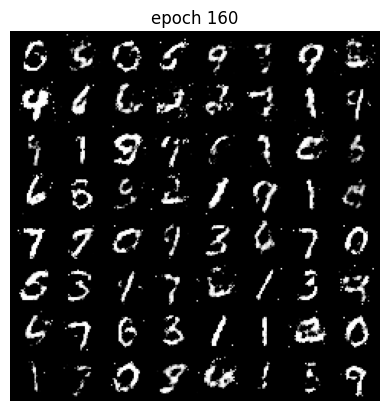

Epoch 160 of 200
Generator loss: 1.42254141, Discriminator loss: 1.02293706


118it [00:09, 11.81it/s]                         


Epoch 161 of 200
Generator loss: 1.40668760, Discriminator loss: 1.02083356


118it [00:10, 11.80it/s]                         


Epoch 162 of 200
Generator loss: 1.37593962, Discriminator loss: 1.03504887


118it [00:09, 11.87it/s]                         


Epoch 163 of 200
Generator loss: 1.45033136, Discriminator loss: 1.02621224


118it [00:10, 11.73it/s]                         


Epoch 164 of 200
Generator loss: 1.33779829, Discriminator loss: 1.05536250


118it [00:09, 11.84it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


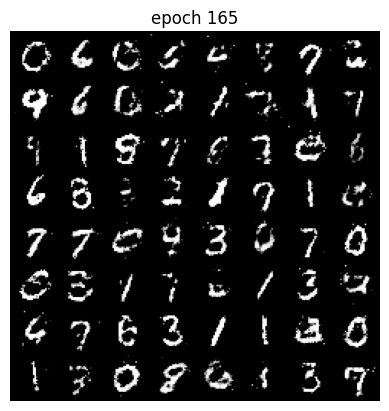

Epoch 165 of 200
Generator loss: 1.40972488, Discriminator loss: 1.02176436


118it [00:09, 11.81it/s]                         


Epoch 166 of 200
Generator loss: 1.38662607, Discriminator loss: 1.03578502


118it [00:09, 11.81it/s]                         


Epoch 167 of 200
Generator loss: 1.40623509, Discriminator loss: 1.03981833


118it [00:10, 11.79it/s]                         


Epoch 168 of 200
Generator loss: 1.41947960, Discriminator loss: 1.02696652


118it [00:10, 11.78it/s]                         


Epoch 169 of 200
Generator loss: 1.44960289, Discriminator loss: 1.00891974


118it [00:10, 11.77it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


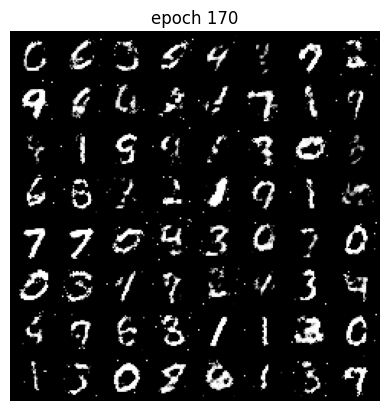

Epoch 170 of 200
Generator loss: 1.37375606, Discriminator loss: 1.04431249


118it [00:09, 11.84it/s]                         


Epoch 171 of 200
Generator loss: 1.42195091, Discriminator loss: 1.02401008


118it [00:09, 11.83it/s]                         


Epoch 172 of 200
Generator loss: 1.36089705, Discriminator loss: 1.04307962


118it [00:09, 11.83it/s]                         


Epoch 173 of 200
Generator loss: 1.38434514, Discriminator loss: 1.03726389


118it [00:09, 11.84it/s]                         


Epoch 174 of 200
Generator loss: 1.39706425, Discriminator loss: 1.03625280


118it [00:09, 11.84it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


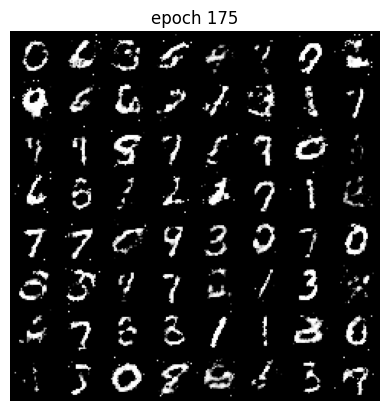

Epoch 175 of 200
Generator loss: 1.34701298, Discriminator loss: 1.03563285


118it [00:10, 11.73it/s]                         


Epoch 176 of 200
Generator loss: 1.33330756, Discriminator loss: 1.07051744


118it [00:09, 11.85it/s]                         


Epoch 177 of 200
Generator loss: 1.35564214, Discriminator loss: 1.05557129


118it [00:09, 11.86it/s]                         


Epoch 178 of 200
Generator loss: 1.37356813, Discriminator loss: 1.04160686


118it [00:09, 11.86it/s]                         


Epoch 179 of 200
Generator loss: 1.32148589, Discriminator loss: 1.06001311


118it [00:09, 11.87it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


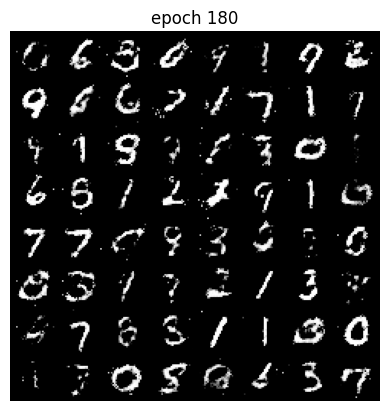

Epoch 180 of 200
Generator loss: 1.32804742, Discriminator loss: 1.05176744


118it [00:09, 11.83it/s]                         


Epoch 181 of 200
Generator loss: 1.32575742, Discriminator loss: 1.06019743


118it [00:09, 11.84it/s]                         


Epoch 182 of 200
Generator loss: 1.26377147, Discriminator loss: 1.08869489


118it [00:09, 11.91it/s]                         


Epoch 183 of 200
Generator loss: 1.30442767, Discriminator loss: 1.05484689


118it [00:09, 11.93it/s]                         


Epoch 184 of 200
Generator loss: 1.33220501, Discriminator loss: 1.05070294


118it [00:09, 11.95it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


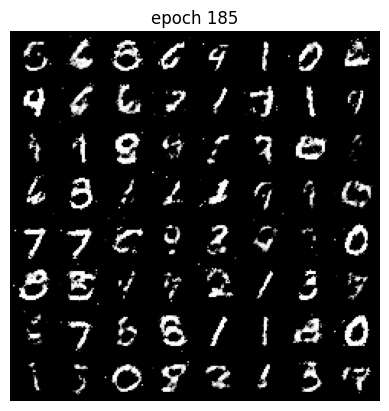

Epoch 185 of 200
Generator loss: 1.34311230, Discriminator loss: 1.06392154


118it [00:09, 11.94it/s]                         


Epoch 186 of 200
Generator loss: 1.34522693, Discriminator loss: 1.05880113


118it [00:09, 11.98it/s]                         


Epoch 187 of 200
Generator loss: 1.27153865, Discriminator loss: 1.07713489


118it [00:09, 11.87it/s]                         


Epoch 188 of 200
Generator loss: 1.30136998, Discriminator loss: 1.08249788


118it [00:09, 11.96it/s]                         


Epoch 189 of 200
Generator loss: 1.29418093, Discriminator loss: 1.07819085


118it [00:09, 11.98it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


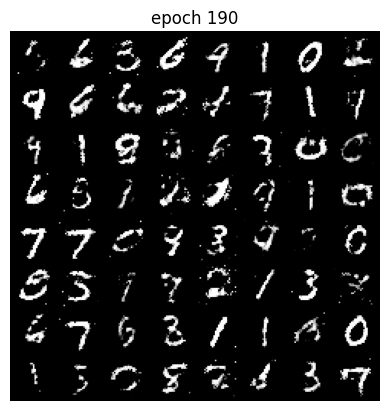

Epoch 190 of 200
Generator loss: 1.24539891, Discriminator loss: 1.09994749


118it [00:09, 11.90it/s]                         


Epoch 191 of 200
Generator loss: 1.29169621, Discriminator loss: 1.08702973


118it [00:09, 11.92it/s]                         


Epoch 192 of 200
Generator loss: 1.22917840, Discriminator loss: 1.11533479


118it [00:09, 11.88it/s]                         


Epoch 193 of 200
Generator loss: 1.31378691, Discriminator loss: 1.07237328


118it [00:09, 11.82it/s]                         


Epoch 194 of 200
Generator loss: 1.30259814, Discriminator loss: 1.07515291


118it [00:09, 11.89it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


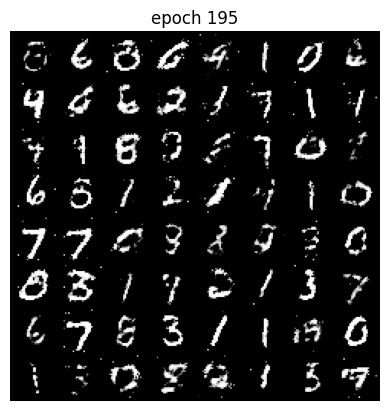

Epoch 195 of 200
Generator loss: 1.28886117, Discriminator loss: 1.08237956


118it [00:09, 11.87it/s]                         


Epoch 196 of 200
Generator loss: 1.27378252, Discriminator loss: 1.08365625


118it [00:09, 11.87it/s]                         


Epoch 197 of 200
Generator loss: 1.31697016, Discriminator loss: 1.07462872


118it [00:09, 11.83it/s]                         


Epoch 198 of 200
Generator loss: 1.31981815, Discriminator loss: 1.06111054


118it [00:09, 11.84it/s]                         


Epoch 199 of 200
Generator loss: 1.24808768, Discriminator loss: 1.09521736


118it [00:10, 11.76it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


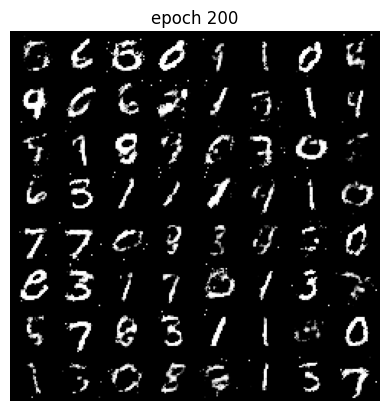

Epoch 200 of 200
Generator loss: 1.25053144, Discriminator loss: 1.09267841


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################
    
def discriminator_loss(output, true_label):
    #print(output.shape, true_label.shape)
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        image, _ = data
        image = image.to(device)
        for step in range(k):
            real_data = image
            real_data += torch.randn_like(real_data)*0.05
            
            optim_d.zero_grad()
            real_out = discriminator(real_data)
            real_labels = label_real(real_out.shape[0])
            real_loss = discriminator_loss(real_out, real_labels)
            
            fake_gen_data = generator(create_noise(batch_size, nz)).detach()
            fake_out = discriminator(fake_gen_data)
            fake_labels = label_fake(fake_gen_data.shape[0])
            fake_loss = discriminator_loss(fake_out, fake_labels)
            
            loss_d += real_loss.item()+fake_loss.item()
            real_loss.backward()
            fake_loss.backward()
            optim_d.step()
        
        optim_g.zero_grad()
        fake_gen_data = generator(create_noise(batch_size, nz))
        fake_out = discriminator(fake_gen_data)
        real_labels = label_real(batch_size)        
        gen_loss = generator_loss(fake_out, real_labels)
        
        loss_g += gen_loss.item()
        gen_loss.backward()
        optim_g.step()
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs_partc_ipnoise/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs_partc_ipnoise/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs_partc_ipnoise/generator_images.gif', imgs)

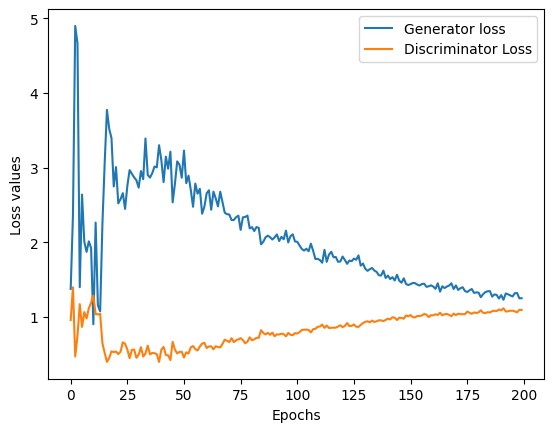

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss values")
plt.savefig('outputs_partc_ipnoise/loss.png')